<a href="https://colab.research.google.com/github/vandarsar/Linear-regression/blob/main/Customer_Analytics_Preparing_Data_for_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Two data scientists working on a dashboard.](hr-image-small.png)

A common problem when creating models to generate business value from data is that the datasets can be so large that it can take days for the model to generate predictions. Ensuring that your dataset is stored as efficiently as possible is crucial for allowing these models to run on a more reasonable timescale without having to reduce the size of the dataset.

You've been hired by a major online data science training provider called *Training Data Ltd.* to clean up one of their largest customer datasets. This dataset will eventually be used to predict whether their students are looking for a new job or not, information that they will then use to direct them to prospective recruiters.

You've been given access to `customer_train.csv`, which is a subset of their entire customer dataset, so you can create a proof-of-concept of a much more efficient storage solution. The dataset contains anonymized student information, and whether they were looking for a new job or not during training:

| Column       | Description                                  |
|------------- |--------------------------------------------- |
| `student_id`   | A unique ID for each student.                 |
| `city`  | A code for the city the student lives in.  |
| `city_development_index` | A scaled development index for the city.       |
| `gender` | The student's gender.       |
| `relevant_experience` | An indicator of the student's relevant experience.       |
| `enrolled_university` | The type of university course enrolled in (if any).       |
| `education_level` | The student's education level.       |
| `major_discipline` | The educational discipline of the student.       |
| `experience` | The student's total experience (in years).       |
| `company_size` | The number of employees at the student's current employer.       |
| `last_new_job` | The number of years between the student's current and previous jobs.       |
| `training_hours` | The number of hours of training completed.       |
| `job_change` | An indicator of whether the student is looking for a new job (`1`) or not (`0`).       |

In [444]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [445]:
# Start your code here!
import pandas as pd


importing data into the dataframe

In [446]:
ds_jobs = pd.read_csv("/content/drive/MyDrive/Colab datasets/customer_train.csv")

Creating a copy of the dataframe as df

In [447]:
ds_jobs_clean = ds_jobs.copy()

checking the shape of the dataframe

In [448]:
ds_jobs_clean.shape

(19158, 14)

cheking the data types of all the 14 columns 

In [449]:
ds_jobs_clean.dtypes

student_id                  int64
city                       object
city_development_index    float64
gender                     object
relevant_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
job_change                float64
dtype: object

student_id  and training_hours columns are int64 that must be converted to int32
We'll will define and function to handle that

In [450]:
ds_jobs_clean[["student_id", "training_hours"]] = ds_jobs_clean[["student_id", "training_hours"]].astype("int32")

Doingcity_development_index and job_change will be changed to float 16

In [451]:
ds_jobs_clean[["city_development_index", "job_change"]] = ds_jobs_clean[["city_development_index", "job_change"]].astype("float16")

convert education_level column to an ordinal categorical variable

In [452]:
string_df = ds_jobs_clean[["city", "gender", "relevant_experience" , "enrolled_university", "education_level", "major_discipline", "experience", "company_size", "company_type", "last_new_job"]]
for col in string_df:
    ds_jobs_clean[col] = ds_jobs_clean[col].astype('category')
    


checking the dtype of the dataframe again

In [453]:
ds_jobs_clean.dtypes   		#checking the types again

student_id                   int32
city                      category
city_development_index     float16
gender                    category
relevant_experience       category
enrolled_university       category
education_level           category
major_discipline          category
experience                category
company_size              category
company_type              category
last_new_job              category
training_hours               int32
job_change                 float16
dtype: object

In [454]:
ds_jobs_clean.last_new_job.dtype

CategoricalDtype(categories=['1', '2', '3', '4', '>4', 'never'], ordered=False)

In [455]:
ds_jobs_clean.head(10)

,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,8949,city_103,0.919922,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.775879,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624023,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789062,NaN,No relevant experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767090,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764160,NaN,Has relevant experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.919922,Male,Has relevant experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762207,Male,Has relevant experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.919922,Male,Has relevant experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.919922,NaN,Has relevant experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


some categorical columns need to be ordered i.e ordinal variables which are variables that has a natural or an inherent ordering to them.
Ordering the following columns:

relevant_experience
enrolled_university
education_level
experience
company_size
last_new_job


In [456]:
ds_jobs_clean.relevant_experience.dtype

CategoricalDtype(categories=['Has relevant experience', 'No relevant experience'], ordered=False)

In [482]:
relevance_exp_order = ['No relevant experience','Has relevant experience']
ds_jobs_clean["relevant_experience"].cat.reorder_categories(relevance_exp_order, ordered=True, inplace=True)

<ipython-input-482-9a0abc7d2a6c>:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  ds_jobs_clean["relevant_experience"].cat.reorder_categories(relevance_exp_order, ordered=True, inplace=True)


In [483]:
uni_enrol_order = ['no_enrollment', 'Part time course', 'Full time course']
ds_jobs_clean["enrolled_university"].cat.reorder_categories(uni_enrol_order, ordered=True, inplace=True)

<ipython-input-483-245ed0621be1>:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  ds_jobs_clean["enrolled_university"].cat.reorder_categories(uni_enrol_order, ordered=True, inplace=True)


In [459]:
educ_order = ["Primary School", "High School", "Graduate", "Masters",  "Phd"]
ds_jobs_clean["education_level"].cat.reorder_categories(educ_order, ordered=True, inplace=True)

<ipython-input-459-8055f237616f>:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  ds_jobs_clean["education_level"].cat.reorder_categories(educ_order, ordered=True, inplace=True)


In [460]:
expe_order = [ '<1', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
                  '19', '2', '20', '3', '4', '5', '6', '7', '8', '9',
                  '>20']
ds_jobs_clean["experience"].cat.reorder_categories(expe_order, ordered=True, inplace=True)

<ipython-input-460-1ba64eb6222b>:4: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  ds_jobs_clean["experience"].cat.reorder_categories(expe_order, ordered=True, inplace=True)


In [461]:
company_size_order  = ["<10", "10-49", "50-99", "100-499", "500-999", "1000-4999","5000-9999", "10000+"]
ds_jobs_clean["company_size"].cat.reorder_categories(company_size_order, ordered=True, inplace=True)

<ipython-input-461-fd73b096b133>:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  ds_jobs_clean["company_size"].cat.reorder_categories(company_size_order, ordered=True, inplace=True)


In [462]:
last_new_job_order =['1', '2', '3', '4', '>4', 'never']
ds_jobs_clean["last_new_job"].cat.reorder_categories(last_new_job_order, ordered=True, inplace=True)

<ipython-input-462-60cb3917c1f0>:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  ds_jobs_clean["last_new_job"].cat.reorder_categories(last_new_job_order, ordered=True, inplace=True)


checking dtypes again

In [463]:
ds_jobs_clean.last_new_job.dtype

CategoricalDtype(categories=['1', '2', '3', '4', '>4', 'never'], ordered=True)

filtering the dataframe for students with 10 OR more years of experience at companies with at least 1000
the column of intrest are experience which tells the estimated years a student has spent working and company size that tells how many employees has a company.

In [464]:
experience_list = ["10","11","12","13","14","15","16","17","18","19",">20"]
over_1k_employees = ["1000-4999","5000-9999", "10000+"]

In [465]:
ds_jobs_clean[ds_jobs_clean["experience"].isin(experience_list)]
ds_jobs_clean[ds_jobs_clean["company_size"].isin(over_1k_employees)]




,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
9,699,city_103,0.919922,NaN,Has relevant experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0
11,23853,city_103,0.919922,Male,Has relevant experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0
12,25619,city_61,0.913086,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,3,23,0.0
17,5764,city_21,0.624023,NaN,Has relevant experience,no_enrollment,Graduate,STEM,2,5000-9999,Pvt Ltd,2,7,0.0
18,2156,city_21,0.624023,NaN,Has relevant experience,no_enrollment,Graduate,STEM,7,10000+,Pvt Ltd,never,23,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19108,15038,city_16,0.910156,Male,Has relevant experience,no_enrollment,Graduate,STEM,8,1000-4999,Pvt Ltd,3,34,0.0
19127,549,city_80,0.847168,Male,Has relevant experience,no_enrollment,Graduate,STEM,8,10000+,Public Sector,1,10,1.0
19128,3365,city_16,0.910156,NaN,Has relevant experience,no_enrollment,Graduate,Humanities,>20,1000-4999,Pvt Ltd,>4,23,0.0
19131,18072,city_116,0.743164,Male,No relevant experience,no_enrollment,Masters,STEM,8,10000+,NaN,1,48,0.0


In [466]:
ds_jobs_clean_filtered = ds_jobs_clean[(ds_jobs_clean["experience"].isin(experience_list))&(ds_jobs_clean["company_size"].isin(over_1k_employees))]

In [467]:
ds_jobs_clean

,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,8949,city_103,0.919922,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.775879,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624023,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789062,NaN,No relevant experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767090,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.877930,Male,No relevant experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.919922,Male,Has relevant experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.919922,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.801758,Male,Has relevant experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


checking shape

In [468]:
ds_jobs_clean.dtypes

student_id                   int32
city                      category
city_development_index     float16
gender                    category
relevant_experience       category
enrolled_university       category
education_level           category
major_discipline          category
experience                category
company_size              category
company_type              category
last_new_job              category
training_hours               int32
job_change                 float16
dtype: object

In [469]:
ds_jobs_clean.shape

(19158, 14)

visualising the proportion of phd in the education level column

In [470]:
import seaborn as sns 			# importing seaborn
import matplotlib.pyplot as plt 	# and matplotlib libraries
ds_jobs_clean.education_level.value_counts(normalize=True)

Graduate          0.620280
Masters           0.233234
High School       0.107872
Phd               0.022141
Primary School    0.016472
Name: education_level, dtype: float64

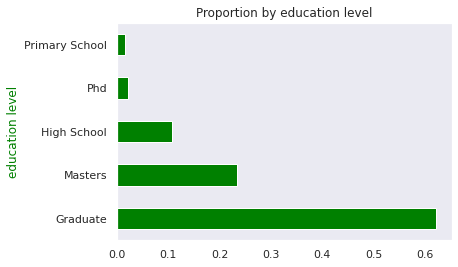

In [471]:
ds_jobs_clean.education_level.value_counts(normalize=True).plot(kind="barh", color="green")
plt.title("Proportion by education level")
plt.ylabel("education level", color="green")
plt.show()

What type of company tends to give employees more trainning?
Also, get a sense of how this trainning are distributed between men and women

In [472]:
ds_jobs_clean.company_type.value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [473]:
ds_jobs_clean.groupby(["company_type", "gender"]).training_hours.sum()
# Looks like private company, much like in the Public sector tend to give more trainnings to their employees and more so to men. infact, the trend is the same across all sampled exterprises.

company_type         gender
Early Stage Startup  Female      2491
                     Male       27472
                     Other        194
Funded Startup       Female      6697
                     Male       49425
                     Other        594
NGO                  Female      3059
                     Male       23150
                     Other         34
Other                Female       813
                     Male        5144
                     Other         45
Public Sector        Female      6297
                     Male       37062
                     Other        256
Pvt Ltd              Female     39352
                     Male      457384
                     Other       5486
Name: training_hours, dtype: int32

In [474]:
# unstacking the dataframe to make it easier to read
ds_jobs_clean.groupby(["company_type", "gender"]).training_hours.sum().unstack(-1)

gender,Female,Male,Other
company_type,,,
Early Stage Startup,2491,27472,194
Funded Startup,6697,49425,594
NGO,3059,23150,34
Other,813,5144,45
Public Sector,6297,37062,256
Pvt Ltd,39352,457384,5486


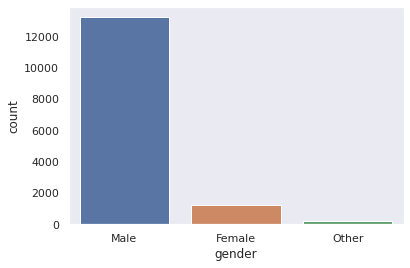

In [475]:
sns.set_theme(style='dark')
sns.countplot(data=ds_jobs_clean, x="gender", order = ds_jobs_clean.gender.value_counts().index)
plt.show()
# the class imbalance was largely responsible for the biased towards men. We can undersample the men's class to rectify this, but thats beyonf the scope of this project

In [476]:
ds_jobs_clean.head(3)

,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,8949,city_103,0.919922,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.775879,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624023,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


In [477]:
# how many men have low education? i.e high school and primary school
male_low_educ = ds_jobs_clean[ds_jobs_clean.education_level.isin(["High School", "Primary School"]) & (ds_jobs_clean["gender"]=="Male")]

In [478]:
# How many women are highly educated? i.e belonging to graduate, masters and phd

female_high_educ = ds_jobs_clean[(ds_jobs_clean["education_level"].isin(["Graduate", "Masters", "Phd"])) & (ds_jobs_clean["gender"]=="Female")]

In [479]:
# combining the 2 dataframes
new_educ_df = pd.concat([male_low_educ, female_high_educ])

In [480]:
new_educ_df.head(3) # Do men with low education tend to earn more than women with high level education?

,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
6,28806,city_160,0.919922,Male,Has relevant experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
28,21538,city_100,0.887207,Male,Has relevant experience,no_enrollment,High School,NaN,11,<10,Pvt Ltd,1,8,1.0
36,12726,city_114,0.925781,Male,No relevant experience,Part time course,High School,NaN,1,10000+,Other,1,152,0.0
